# CHILDCARE COST
Group Members:  Abbinaya Kalidhas, Parthvi Joshi, Purnima Khemka, Sarah Dsouza

##Project Motivation:

This project examines the economics of childcare affordability across U.S. counties using data from 2008–2018 published by the National Database of Childcare Prices. Rising childcare costs have become a critical economic and social issue in the United States, influencing parents’ employment decisions (particularly for mothers), household financial stability, and fertility choices.
Understanding geographic patterns and the structural drivers of childcare costs is therefore essential for designing effective interventions that help families, and societies as a whole, achieve improved overall well-being.
Through this project, we aim to help the governments, employers, and community organizations in identifying high-burden regions, targeting subsidies, and evaluating whether childcare access aligns with local income levels and workforce needs.

##Major stakeholders include:
* Policymakers and government agencies at the federal, state, and county levels who design childcare subsidies, taxation, and workforce programs.
* Employers and HR departments, particularly large firms, or regional labour coalitions, that consider childcare benefits as part of recruitment and retention strategies.
* Families and caregivers, who actually bear the financial and logistical burden of childcare.
* Children, the ultimate beneficiaries or victims of childcare affordability and availability.
* Researchers and economists studying labour markets, inequality, and demographic change.


##Data Description
Data Description
1. childcare_costs.csv - This is the primary dataset and contains county-level information on childcare costs, family structures, labour force participation, and other key demographic indicators from 2008-2018.
Data types: Float and integer
File size: 10.5 MB
Data structure: 34,567 rows × 61 columns
2. counties.csv - This auxiliary dataset provides county-level geographic identifiers, including county names, state names, and county FIPS codes.
Data types: Integer and object
File size: 0.10 MB
Data structure: 3,144 rows × 4 columns




In [ ]:
#Mounting File from Drive

from google.colab import data_table
from google.colab import drive
# Enable the interactive table feature
data_table.enable_dataframe_formatter()
# Access Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading dataset

In [ ]:
#Loading dataset

base_path = "/content/drive/MyDrive/"

df_childcare = pd.read_csv(base_path + "childcare_costs.csv")
df_counties = pd.read_csv(base_path + "counties.csv")

print(df_childcare.shape)
print(df_counties.shape)

#Displaying the top 5 using head function of each csv file
display(df_childcare.head())
display(df_counties.head())


(34567, 61)
(3144, 4)


,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


## Data Summary

In [ ]:
#Finding dataset summary and trying to see what the columns , data types and thier missingness .
def dataset_summary(df, name):
    df.info()
    display(df.describe(include="all"))

dataset_summary(df_childcare, "Childcare Costs Dataset")
dataset_summary(df_counties, "Counties Dataset")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   county_fips_code           34567 non-null  int64  
 1   study_year                 34567 non-null  int64  
 2   unr_16                     34567 non-null  float64
 3   funr_16                    34567 non-null  float64
 4   munr_16                    34567 non-null  float64
 5   unr_20to64                 34567 non-null  float64
 6   funr_20to64                34567 non-null  float64
 7   munr_20to64                34567 non-null  float64
 8   flfpr_20to64               34567 non-null  float64
 9   flfpr_20to64_under6        34567 non-null  float64
 10  flfpr_20to64_6to17         34567 non-null  float64
 11  flfpr_20to64_under6_6to17  34567 non-null  float64
 12  mlfpr_20to64               34567 non-null  float64
 13  pr_f                       34567 non-null  flo

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
count,34567.000000,34567.000000,34567.000000,34567.00000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,...,34567.000000,34567.000000,23593.000000,23383.000000,23593.000000,23593.000000,23593.000000,23383.000000,23383.000000,23383.000000
mean,30388.132786,2012.999711,7.465902,7.02902,7.860291,6.900073,6.482007,7.275457,70.086125,68.821409,...,23.456238,7.634403,101.234253,92.523582,146.051770,130.482768,122.232852,113.421657,106.759749,104.189510
std,15161.015383,3.162232,3.538619,3.56342,4.037657,3.446199,3.477956,3.990758,7.696499,11.758088,...,7.956927,4.501044,34.552888,27.669904,53.698566,43.775370,38.538323,32.819372,29.982431,28.961701
min,1001.000000,2008.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,33.600000,0.000000,...,0.000000,0.000000,18.980000,22.000000,27.730000,21.540000,21.540000,43.080000,43.080000,40.030000
25%,18177.000000,2010.000000,5.100000,4.64000,5.200000,4.600000,4.200000,4.700000,65.100000,62.600000,...,17.610000,4.410000,78.650000,75.000000,108.750000,100.000000,95.880000,90.000000,85.085000,84.255000
50%,29177.000000,2013.000000,7.050000,6.59000,7.390000,6.500000,6.000000,6.800000,70.600000,69.600000,...,23.400000,6.630000,96.530000,88.180000,134.500000,120.990000,113.990000,106.000000,100.250000,99.650000
75%,45081.000000,2016.000000,9.350000,8.88000,9.920000,8.700000,8.250000,9.200000,75.500000,76.100000,...,28.930000,9.920000,119.380000,107.500000,166.330000,148.710000,139.300000,129.315000,124.950000,120.200000
max,56045.000000,2018.000000,36.110000,38.24000,39.740000,33.900000,44.500000,45.500000,100.000000,100.000000,...,87.500000,66.480000,375.400000,308.000000,470.000000,419.000000,385.000000,430.940000,376.320000,331.340000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   county_fips_code    3144 non-null   int64 
 1   county_name         3144 non-null   object
 2   state_name          3144 non-null   object
 3   state_abbreviation  3144 non-null   object
dtypes: int64(1), object(3)
memory usage: 98.4+ KB


,county_fips_code,county_name,state_name,state_abbreviation
count,3144.000000,3144,3144,3144
unique,NaN,1879,51,51
top,NaN,Washington County,Texas,TX
freq,NaN,30,254,254
mean,30381.431616,NaN,NaN,NaN
std,15170.653472,NaN,NaN,NaN
min,1001.000000,NaN,NaN,NaN
25%,18176.500000,NaN,NaN,NaN
50%,29176.000000,NaN,NaN,NaN
75%,45081.500000,NaN,NaN,NaN


###What we understand about our data through the summary:
##Childcare Cost -
* Covers 34,567 county–year records from 2008 to 2018

* Includes 61 mostly numeric variables capturing socioeconomic conditions, labor patterns, and childcare costs

* Provides rich coverage of employment, household structure, income, and childcare pricing across age groups and care types

* Most features are well populated, but childcare cost variables show systematic missingness, likely reflecting reporting or availability differences across counties

##Counties Data -

* The Counties dataset contains 3,144 rows and serves as a geographic reference table, providing county names and state identifiers keyed by county FIPS code.  

* All fields are complete, and the dataset contains no numeric features beyond the identifier.

* This csv seems good for interpretability and geographic labeling when analyzing the childcare cost data.


## Missing Value Analysis

In [ ]:
# We will now check missing values and exactly which variable has a missing one in each dataset

missing_childcare = df_childcare.isna().mean().sort_values(ascending=False) * 100
missing_counties = df_counties.isna().mean().sort_values(ascending=False) * 100

display(missing_childcare.head(15))
display(missing_counties.head(15))


,0
mfccsa,32.354558
mfcc_infant,32.354558
mfcc_toddler,32.354558
mfcc_preschool,32.354558
mc_toddler,31.747042
mc_preschool,31.747042
mcsa,31.747042
mc_infant,31.747042
h_under6_single_m,0.005786
h_6to17_single_m,0.005786


,0
county_fips_code,0.0
county_name,0.0
state_name,0.0
state_abbreviation,0.0


In [ ]:
#Categorizing data into numeric and categorical variables
num_childcare = df_childcare.select_dtypes(include=np.number).columns.tolist()
cat_childcare = df_childcare.select_dtypes(exclude=np.number).columns.tolist()

num_counties = df_counties.select_dtypes(include=np.number).columns.tolist()
cat_counties = df_counties.select_dtypes(exclude=np.number).columns.tolist()


##Skewness

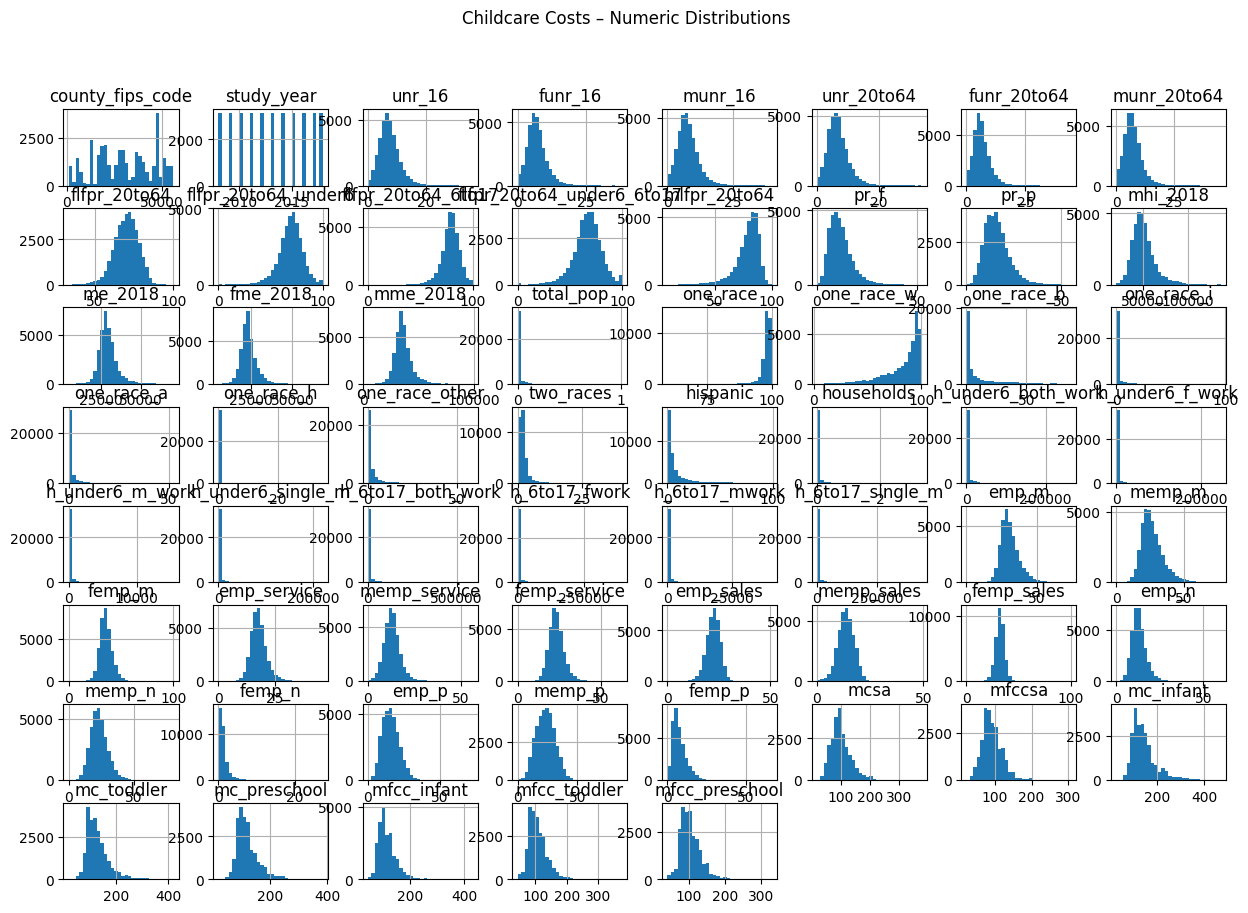

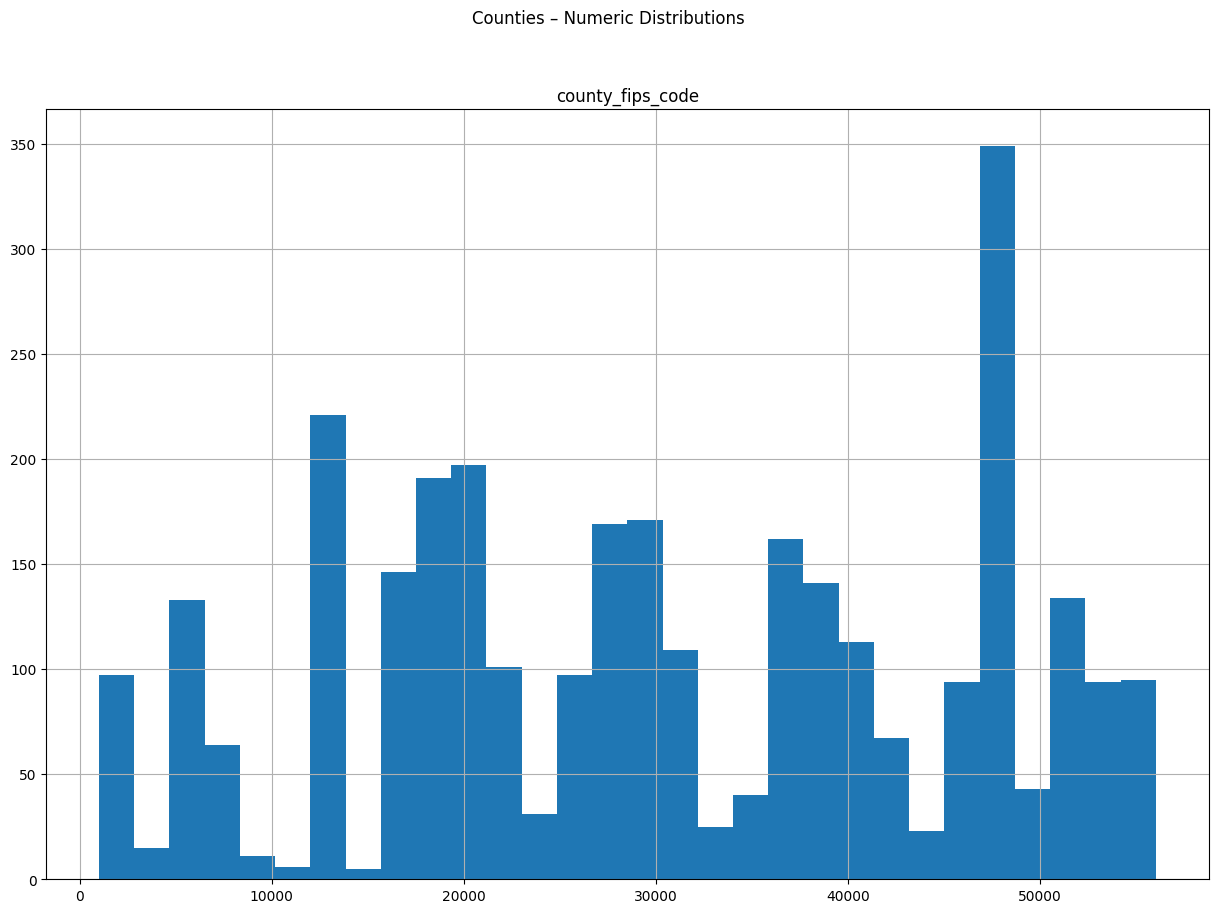

In [ ]:
#We will now check skewness and display it
df_childcare[num_childcare].hist(bins=30, figsize=(15, 10))
plt.suptitle("Childcare Costs – Numeric Distributions")
plt.show()

df_counties[num_counties].hist(bins=30, figsize=(15, 10))
plt.suptitle("Counties – Numeric Distributions")
plt.show()



## Observation
* The graphs show that most numerical variables exhibit right-skewed distributions, reflecting a concentration of lower values with a small number of high-value observations. In contrast, study_year and fips_code differ from other variables, as they function as temporal and geographic identifiers rather than continuous measures, resulting in atypical distribution patterns.

## Handling Missing Values

In [ ]:
#Handling missing values except study_year and fipscode in childcare since one is id and other one is year which if imputed might create unreliable usage

num_cols = [
    c for c in df_childcare.select_dtypes(include="number").columns
    if c not in ["county_fips_code", "study_year"]
]

# Median imputation
df_childcare_clean = df_childcare.copy()
df_childcare_clean[num_cols] = df_childcare_clean[num_cols].fillna(
    df_childcare_clean[num_cols].median()
)


In [ ]:
#Checking if missing values are handled
df_childcare_clean.isna().sum().sort_values(ascending=False).head(10)


,0
county_fips_code,0
study_year,0
unr_16,0
funr_16,0
munr_16,0
unr_20to64,0
funr_20to64,0
munr_20to64,0
flfpr_20to64,0
flfpr_20to64_under6,0


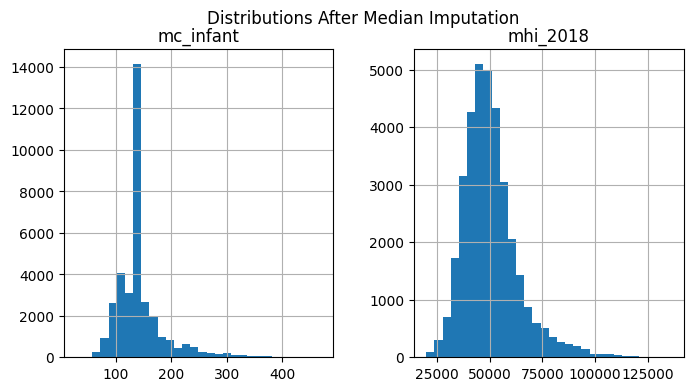

In [ ]:
#Checking random 2 variables after imputing if any change is seen
df_childcare_clean[["mc_infant", "mhi_2018"]].hist(bins=30, figsize=(8,4))
plt.suptitle("Distributions After Median Imputation")
plt.show()


## Checking Imbalance

In [ ]:
#checking Imbalance in data which might help see biases
for col in cat_childcare:
    print(f"\nChildcare – {col}")
    display(df_childcare[col].value_counts(normalize=True).head(5))

for col in cat_counties:
    print(f"\nCounties – {col}")
    display(df_counties[col].value_counts(normalize=True).head(5))



Counties – county_name


,proportion
county_name,
Washington County,0.009542
Jefferson County,0.007952
Franklin County,0.007634
Lincoln County,0.007316
Jackson County,0.007316



Counties – state_name


,proportion
state_name,
Texas,0.080789
Georgia,0.050573
Virginia,0.042621
Kentucky,0.038168
Missouri,0.036578



Counties – state_abbreviation


,proportion
state_abbreviation,
TX,0.080789
GA,0.050573
VA,0.042621
KY,0.038168
MO,0.036578


## Observation:

* Imbalance analysis revealed that some states contribute a disproportionately large number of counties to the dataset.

* This structural imbalance is important for interpreting childcare affordability patterns, as county-level summaries may be influenced by a small number of high-county states rather than reflecting uniform national trends.

* County name frequency reflects repeated historical naming across states, while state-level proportions highlight that some states, such as Texas and Georgia, contain substantially more counties than others.



In [ ]:
#Defined a few key variables across domains like childcare cost, income and affordability, female labor force and poverty signal
key_vars = [
    "mc_infant",
    "mc_toddler",
    "mc_preschool",
    "mfcc_infant",
    "mhi_2018",
    "me_2018",
    "flfpr_20to64",
    "flfpr_20to64_under6",
    "pr_f"
]


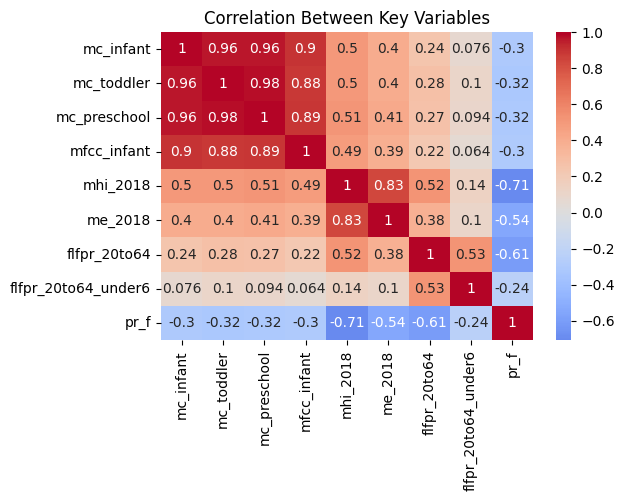

In [ ]:
# Checking any correlation between the key variables
corr = df_childcare_clean[key_vars].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Key Variables")
plt.show()


## Observation
* Childcare costs across ages and care types are highly correlated (~0.88–0.98), indicating a common local market price.

* Higher-income counties tend to have higher childcare costs, with moderate correlations (~0.49–0.51).

* Female labor force participation moderately correlates with both income and childcare costs, linking stronger labor markets with more expensive childcare.

* Poverty rates strongly negatively correlate with income (~−0.71) and are also associated with lower childcare costs and labor participation.

* Female labor participation among mothers with young children is positively related to overall female participation but only weakly linked to childcare costs, suggesting other local constraints.

* These patterns indicate distinct county profiles (e.g., high-income/high-cost/low-poverty vs. low-income/low-cost/high-poverty), supporting clustering or dimensionality reduction approaches.

##Outlier Detection

In [ ]:
#Outlier Detection
def outlier_pct(df, cols):
    outliers = {}
    for c in cols:
        Q1, Q3 = df[c].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        outliers[c] = (
            ((df[c] < Q1 - 1.5 * IQR) | (df[c] > Q3 + 1.5 * IQR)).mean()
        ) * 100
    return pd.DataFrame.from_dict(outliers, orient="index", columns=["% Outliers"])

display(outlier_pct(df_childcare, num_childcare))
display(outlier_pct(df_counties, num_counties))


,% Outliers
county_fips_code,0.000000
study_year,0.000000
unr_16,2.435849
funr_16,2.574710
munr_16,2.670177
...,...
mc_toddler,2.971042
mc_preschool,2.855324
mfcc_infant,2.045303
mfcc_toddler,1.215032


,% Outliers
county_fips_code,0.0


#Observation

Mostly Outlier ranges from 1-5% , However certain variables like one_race_b, once_race_i , h_6to17_mwork, h_6to17_single_m , spanic	households
h_under6_both_work
h_under6_f_work
h_under6_m_work
h_under6_single_m
h_6to17_both_work
h_6to17_fwork fall in the 11-13% outlier range .

## Principle Component Analysis

This analysis was performed to check if the data helps reveal  childcare affordability patterns across counties are driven by a few underlying dimensions, simplifying interpretation and supporting similarity-based analysis

In [ ]:
#Scaling for structure
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_childcare = scaler.fit_transform(df_childcare[num_childcare])
X_counties = scaler.fit_transform(df_counties[num_counties])


In [ ]:
# Select numeric columns only
num_cols = df_childcare_clean.select_dtypes(include="number").columns

# Remove ID / time columns
num_cols = [c for c in num_cols if c not in ["county_fips_code", "study_year"]]

X_childcare = df_childcare_clean[num_cols]


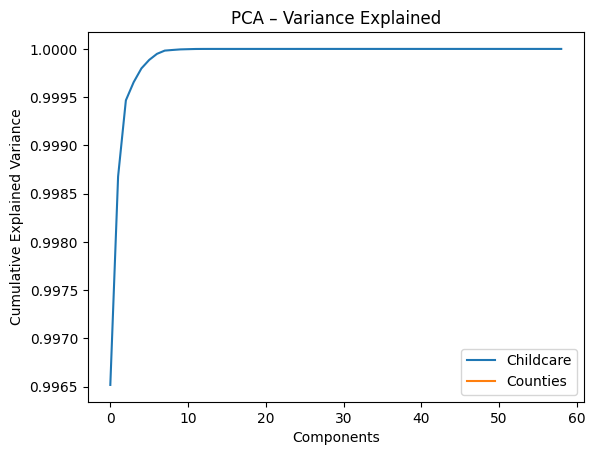

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca_childcare = PCA().fit(X_childcare)
pca_counties = PCA().fit(X_counties)

plt.plot(np.cumsum(pca_childcare.explained_variance_ratio_), label="Childcare")
plt.plot(np.cumsum(pca_counties.explained_variance_ratio_), label="Counties")
plt.legend()
plt.xlabel("Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Variance Explained")
plt.show()


## Observation:
* The curve gets steep after first few 10 variables and is almost at 100% variance and then it is looking flat . This means there is redundance in the features and are correlated well.

* Our understanding is that PCA was not interpreted for the counties dataset, as it serves as a form of a lookup table.

* The rapid concentration of variance suggests strong co-movement among childcare cost, income, and labor force variables, indicating that affordability may be summarized along a few dominant axes. This insight supports similarity-based reasoning and motivates questions around county-level affordability profiles and extreme cases

## Notable Observations


Childcare cost variables exhibit consistently strong right-skew across all age groups and care types, with a small number of counties showing extremely high weekly costs relative to the national median.

Despite the large number of features in the childcare dataset, PCA reveals that most of the variance is captured by only a few principal components, indicating substantial redundancy and strong co-movement among cost, income, and labor-related variables.

Population size and certain demographic composition variables display a notably higher proportion of statistical outliers, highlighting the extent of structural heterogeneity across U.S. counties.

Childcare cost fields contain systematic missingness rather than random gaps, raising uncertainty about whether missing values reflect the absence of regulated childcare services, differences in reporting practices, or other structural factors.

While high childcare costs appear to coincide with higher income and labor force participation in some counties, the extent to which these relationships vary geographically remains unclear and warrants deeper investigation.


Geographic imbalance in the counties dataset shows that states with a large number of counties contribute disproportionately to national county-level summaries, suggesting that observed affordability patterns may be influenced by administrative structure rather than uniform national trends.

Extreme childcare cost outliers appear to represent genuine high-cost counties rather than data errors, making them particularly relevant for understanding affordability stress and regional disparities.

The strong variance concentration observed in PCA suggests the presence of a small number of latent dimensions underlying childcare affordability, motivating further analysis focused on similarity, grouping, or segmentation of counties.

## AI Disclosure Link
1) https://chatgpt.com/share/697a9188-3de0-800c-8c77-a22f9d6edce7
2) https://chatgpt.com/share/697ab5fe-b2fc-8002-a1c7-0325a4b2b345
